<a href="https://colab.research.google.com/github/trmckibben/CalomirisPritchett_data/blob/master/nov23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pa
import numpy as np

data = pa.read_csv('https://raw.githubusercontent.com/trmckibben/CalomirisPritchett_data/master/CalomirisPritchettdata.csv')

In [57]:
#fix name cause format is terrible
data["Sellers Name"] = data["Sellers Last Name"] + "," + " " + data["Sellers First Name"]
data["Buyers Name"] = data["Buyers Last Name"] + "," + " " + data["Buyers First Name"]
data["Notary Name"] = data["Notary Last Name"] + "," + " " + data["Notary First Name"]

In [58]:
data

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,Sellers State of Origin,Representing Seller,Relationship to Seller,Buyers First Name,Buyers Last Name,Buyers County of Origin,Buyers State of Origin,Representing Buyer,Relationship to Buyer,Slave Name,Sex,Age,Color,Occupation,Family Relationship,Name Child 1,Sex Child 1,Age Child 1,Name Child 2,Sex Child 2,Age Child 2,Name Child 3,Sex Child 3,Age Child 3,Name Child 4,Sex Child 4,Age Child 4,Name Child 5,Sex Child 5,Age Child 5,Name Child 6,Sex Child 6,Age Child 6,Name Child 7,Sex Child 7,Age Child 7,Name Child 8,Sex Child 8,Age Child 8,Guaranteed,Notes on Guarantee,Number of Total Slaves,Number of Adult Slaves,Number of Child Slaves,Number of Prices,Price,Payment Method,Payment flag,DUMMY credit,Down Payment,mthcred,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale,Sellers Name,Buyers Name,Notary Name
0,1,70,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,AL,James Whitfield Bozeman,Agent,Maria,Hopson,.,.,.,.,Shadrack,M,40,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,650,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Screws, Benjamin","Hopson, Maria","Coffey, John French"
1,2,70,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,LA,.,.,Peyton N.,Reynolds,New Orleans,LA,.,.,Jane,F,44,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,550,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Galseran, Santiago","Reynolds, Peyton N.","Shannon, William"
2,3,70,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,LA,Jean Louis Moinet,Joint Seller,Heloise,Bagneris,New Orleans,LA,.,.,Helen,F,24,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1000,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Macou, Pierre","Bagneris, Heloise","Gottschalk, Edward George"
3,4,70,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,TX,.,.,Francis,Dugue Jr.,Jefferson,LA,.,.,Jeff,M,23,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,1400,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Irby, Benjamin Franklin","Dugue Jr., Francis","Laresche, Paul Emile"
4,5,70,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,LA,.,.,Anthony,O'Dowd,New Orleans,LA,.,.,John,M,12,Negro,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,1,0,1,700,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Condon, Richard","O'Dowd, Anthony","Rareshide, George"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,15321,87,265,KRZC,Amedee,Ducatel,8/3/1861,Nywatt C.,Cutler,Jefferson,LA,.,.,Matthew Jules,Bujac,New Orleans,LA,.,.,Thomassine,F,25,Mulatto,.,Mother of 1 Child,Ernest,M,8,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,1,1,1,1100,Cash,NaN,0,NaN,NaN,NaN,0.00602698,0.07477,NaN,NaN,NaN,0,NaN,NaN,NaN,"Cutler, Nywatt C.","Bujac, Matthew Jules","Ducatel, Amedee"
14709,15370,87,332,KRZC,Adolphe,Mazareau,5/7/1861,John G.,Chadwick,New Orleans,LA,.,.,Sarah Ann,Chadwick,New Orleans,LA,.,.,Lucinda,F,24,Negro,.,Mother of 1 Child,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Yes,Fully guaranteed,3,3,0,1,1600,Cash and Credit,200 paid cash with a note for 1400 due in 2 ye...,1,200,24,0.08,0.006054689,0.07512528,NaN,NaN,1600,1,OMIT: Group sale,NaN,NaN,"Chadwick, John G.","Chadwick, Sarah Ann","Mazareau, Adolphe"
14710,15371,87,332,KRZC,Adolphe,Mazareau,5/7/1861,John G.,Chadwick,New Orleans,LA,.,.,Sarah Ann,Chadwick,New Orleans,LA,.,.,Child,.,1,.,.,Child of Lucinda,.,.,.,.,.,.,.

In [59]:
#getting all of the column names
cols = list(data.columns.values)

In [60]:
cols

['ID number',
 'Conveyance',
 'Page',
 'Researcher',
 'Notary First Name',
 'Notary Last Name',
 'Sales Date',
 'Sellers First Name',
 'Sellers Last Name',
 'Sellers County of Origin',
 'Sellers State of Origin',
 'Representing Seller',
 'Relationship to Seller',
 'Buyers First Name',
 'Buyers Last Name',
 'Buyers County of Origin',
 'Buyers State of Origin',
 'Representing Buyer',
 'Relationship to Buyer',
 'Slave Name',
 'Sex',
 'Age',
 'Color',
 'Occupation',
 'Family Relationship',
 'Name Child 1',
 'Sex Child 1',
 'Age Child 1',
 'Name Child 2',
 'Sex Child 2',
 'Age Child 2',
 'Name Child 3',
 'Sex Child 3',
 'Age Child 3',
 'Name Child 4',
 'Sex Child 4',
 'Age Child 4',
 'Name Child 5',
 'Sex Child 5',
 'Age Child 5',
 'Name Child 6',
 'Sex Child 6',
 'Age Child 6',
 'Name Child 7',
 'Sex Child 7',
 'Age Child 7',
 'Name Child 8',
 'Sex Child 8',
 'Age Child 8',
 'Guaranteed',
 'Notes on Guarantee',
 'Number of Total Slaves',
 'Number of Adult Slaves',
 'Number of Child Slaves'

In [61]:
# make dataframe with ID number, sales date, representing seller, slave name, sex, age, color, price
dataless = data[['ID number', 'Sales Date', 'Sex', 'Age', 'Color', 'Price']]

In [62]:
#some of the rows have NaN values for price, which is needed for project so, throw those out.
dataless = dataless[dataless['Price'].notna()]

In [63]:
#check all values in sex column
dataless.Sex.unique()

array(['M', 'F', nan, '.', 'F ', 'M ', 'F       '], dtype=object)

In [64]:
#cry because array(['M', 'F', nan, '.', 'F ', 'M ', 'F       '], dtype=object) and why would you do that? 
#Then fix the values so they are uniform for god's sake
dataless.loc[(dataless.Sex == 'M '),'Sex']='M'
dataless.loc[(dataless.Sex == 'F '),'Sex']='F'
dataless.loc[(dataless.Sex == 'F       '),'Sex']='F'
dataless.loc[(dataless.Sex == '.'),'Sex']=np.NaN
dataless.loc[pa.isna(dataless.Sex),'Sex'] = 'U'
dataless.Sex.unique()


array(['M', 'F', 'U'], dtype=object)

In [65]:
#Find out our possible Colors.
dataless.Color.unique()

array(['.', 'Negro', 'Mulatto', 'Griff', 'Dark Griff', 'Light Black',
       'Black', 'Creole Negro', 'Yellow', 'Quarteroon', 'Colored',
       'Creole Mulatto', 'Copper', 'Creole', 'Dark Negro',
       'Light Mulatto', 'Bright Mulatto', 'Dark', 'Dark Mulatto', 'Brown',
       'Light Griff', 'Dark Copper', 'Mulatto, Griff', 'Light Negro',
       'Fair Mulatto', 'Bright Color', 'Light', nan, 'Light Brown',
       'Albino, Negro', 'Dark Orange, Griff ', 'Chestnut',
       'Yellow, Griff', 'Negro ', 'Black Negro', '. ', 'Griff Creole'],
      dtype=object)

In [115]:
#fix their weird spacing for repeating values Also, "Griff" is a slave not entirely of African descent but was a number of different ethnicities
dataless.loc[(dataless.Color == 'Negro '),'Color']='Negro'
dataless.loc[(dataless.Color == '. '),'Color']='.'
dataless.loc[(dataless.Color == '.'),'Color']='UC'
dataless.loc[pa.isna(dataless.Color),'Color'] = 'UC'
colorLabels = dataless.Color.unique()

In [67]:
Quarteroon = dataless['Color'].str.contains('Quarteroon')
ttlQuarteroon = Quarteroon.sum()
Black = dataless['Color'].str.contains('Black')
ttlBlack = Black.sum()
Mulatto = dataless['Color'].str.contains('Mulatto')
ttlMulatto = Mulatto.sum()
print(ttlQuarteroon, ttlBlack, ttlMulatto)

25 293 1485


In [68]:
dataless

,ID number,Sales Date,Sex,Age,Color,Price
0,1,10/6/1856,M,40,UC,650
1,2,10/7/1856,F,44,Negro,550
2,3,10/1/1856,F,24,Negro,1000
3,4,10/8/1856,M,23,Negro,1400
4,5,10/8/1856,M,12,Negro,700
...,...,...,...,...,...,...
14704,15268,4/4/1861,M,35,Negro,950
14705,15280,5/23/1861,M,50,Negro,650
14708,15321,8/3/1861,F,25,Mulatto,1100
14709,15370,5/7/1861,F,24,Negro,1600


In [88]:
#I'd suggest the code  This has to be done before all your transformations though!!
dataless = dataless[~(dataless['Price'] == '.')]
dataless = dataless[~(dataless['Age']=='.')]

In [100]:
dataless.loc[(dataless['Price']== '233.33 1/3'),'Price']=233.33

In [70]:
#I think this is what you want for that code above
dataless[dataless['Sex']=='M']

,ID number,Sales Date,Sex,Age,Color,Price
0,1,10/6/1856,M,40,UC,650
3,4,10/8/1856,M,23,Negro,1400
4,5,10/8/1856,M,12,Negro,700
7,8,10/20/1856,M,50,Negro,1200
9,10,11/8/1856,M,20,Negro,1225
...,...,...,...,...,...,...
14701,15212,5/6/1861,M,24,Mulatto,1000
14702,15221,8/29/1861,M,28,Creole Negro,800
14704,15268,4/4/1861,M,35,Negro,950
14705,15280,5/23/1861,M,50,Negro,650


In [101]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

#lb.fit_transform(dataless.Sex)
sex = np.array(dataless.Sex)
#sex = np.append(sex,np.array(dataless.Color))
sexbi = lb.fit_transform(sex)
sexbi[0,:]

array([0, 1, 0])

In [119]:
color = np.array(dataless.Color)


colorbi = lb.fit_transform(color)

colorbi

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [114]:
colorLabels

{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}

In [103]:
combine = np.append(sexbi,colorbi,axis = 1)
combine.shape

(12034, 37)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

In [ ]:
#1 Is there a correlation for price and color?
#2 Is there a correlation for sex and price?
#3 is there a correlation for age and price?

In [104]:
y = np.array(dataless.Price)
age = np.array([dataless.Age])
comb = np.concatenate((combine,age.T),axis = 1)
comb.shape

(12034, 38)

In [105]:
from sklearn.linear_model import LinearRegression
#what is y supposed to be, price?
lr = LinearRegression().fit(comb,y)

lr.coef_

array([-1.94529828e+08, -1.94529531e+08, -1.94529785e+08,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.89599383e+12,  4.89599383e+12,  4.89599383e+12,
        4.89599383e+12,  4.81973878e+00])

In [107]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(comb,y)

lasso.coef_

array([-58.35139097, 236.68895994,  -0.        ,  -0.        ,
       102.469377  ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        , -26.1945745 ,   0.        ,
        34.22319746,  -0.        , 498.60807289,   0.        ,
        -0.        ,   4.8364487 ])

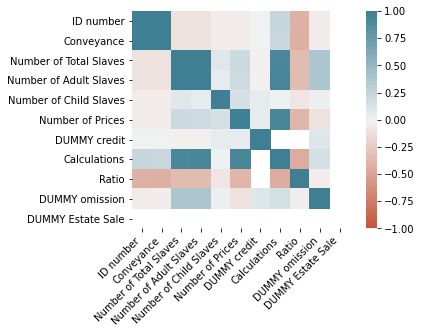

In [112]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [125]:
dataless['Age'] = dataless['Age'].astype(float)
dataless['Price'] = dataless['Price'].astype(float)

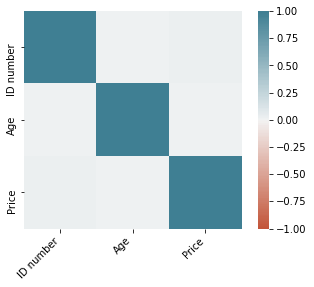

In [126]:
corr = dataless.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);